# Data Cleansing Part 2

## How to Deal with Missing Data?

### Read the dataset|

In [2]:
# import libraries
import pandas as pd
import numpy as np


In [40]:
# read the dataset
df = pd.read_excel('credit-data-training.xlsx')

In [53]:
# explore the data
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [54]:
# check the dimensions of the data
df.shape

(500, 20)

## Let's check and calculate the missing data

In [55]:
# let's calculate missing values
total = df.isnull().sum().sort_values(ascending=False)
# let's calculate the percentage of missing values
percent = df.isnull().sum() / df.isnull().count() * 100
# round the percentage into 1 digit after decimal
percent_rounded = (round(percent, 1)).sort_values(ascending=False)

# concatenate the total and percentage 
missing_data = pd.concat([total, percent_rounded], axis=1, keys=['Total', '%'])

# let's get missing data which is total values greater than 0

missing_data = missing_data[missing_data['Total']>0]


In [56]:
# display the result
missing_data

,Total,%
Duration-in-Current-address,344,68.8
Age-years,12,2.4


In [57]:
# drop the duration-in-current-address
df.drop(columns='Duration-in-Current-address', axis=1, inplace=True)

In [58]:
# compare the mean and median 
age_mean = df['Age-years'].mean()
age_median = df['Age-years'].median()

In [59]:
# print the result
print("The mean of Age-years:", age_mean)
print("The median of Age-years", age_median)

The mean of Age-years: 35.63729508196721
The median of Age-years 33.0


In [51]:
# Import SimpleImputer Object from the sklearn
from sklearn.impute import SimpleImputer

In [60]:
# let's impute the missing value of age-years with median as a strategy

# create impute object
imp = SimpleImputer(missing_values=np.nan, strategy='median')

# get the values of Age-years and reshape into 2D array
age_t = df['Age-years'].values

# transform the age values
df['Age-years'] = imp.fit_transform(age_t.reshape(-1, 1))

In [61]:
# check the missing data again
df.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [62]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,1,33.0,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1,27.0,Other Banks/Depts,2,1,1,1,1,1


----

# How to Detect and Remove Outliers using Boxplot

What is Outlier?
> an outlier is a data point that differs significantly from other observations.

> An outlier may be due to variability in the measurement or it may indicate experimental error

> Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

## Let's read and explore the dataset

In [1]:
# import some manipulation libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [67]:
# read the dataset
train_data = pd.read_csv("train.csv")

In [68]:
# explore the dataset
train_data.head()

,2010 Census Population,City,Land Area,Households with Under 18,Population Density,Total Families,Total Pawdacity Sales
0,4585,Buffalo,3115.50750,746,1.55,1819.50,185328
1,35316,Casper,3894.30910,7788,11.16,8756.32,317736
2,59466,Cheyenne,1500.17840,7158,20.34,14612.64,917892
3,9520,Cody,2998.95696,1403,1.82,3515.62,218376
4,6120,Douglas,1829.46510,832,1.46,1744.08,208008


In [69]:
# check the missing values
train_data.isnull().sum()

2010 Census Population      0
City                        0
Land Area                   0
Households with Under 18    0
Population Density          0
Total Families              0
Total Pawdacity Sales       0
dtype: int64

In [70]:
# check the shape of the data
train_data.shape


(10, 7)

In [73]:
# get numerical columns
num_cols = train_data.describe(exclude='object')
col_names = num_cols.columns
col_names

Index(['2010 Census Population', 'Land Area', 'Households with Under 18',
       'Population Density', 'Total Families', 'Total Pawdacity Sales'],
      dtype='object')

## Let's Plot the boxplot to visualize the distribution of the data


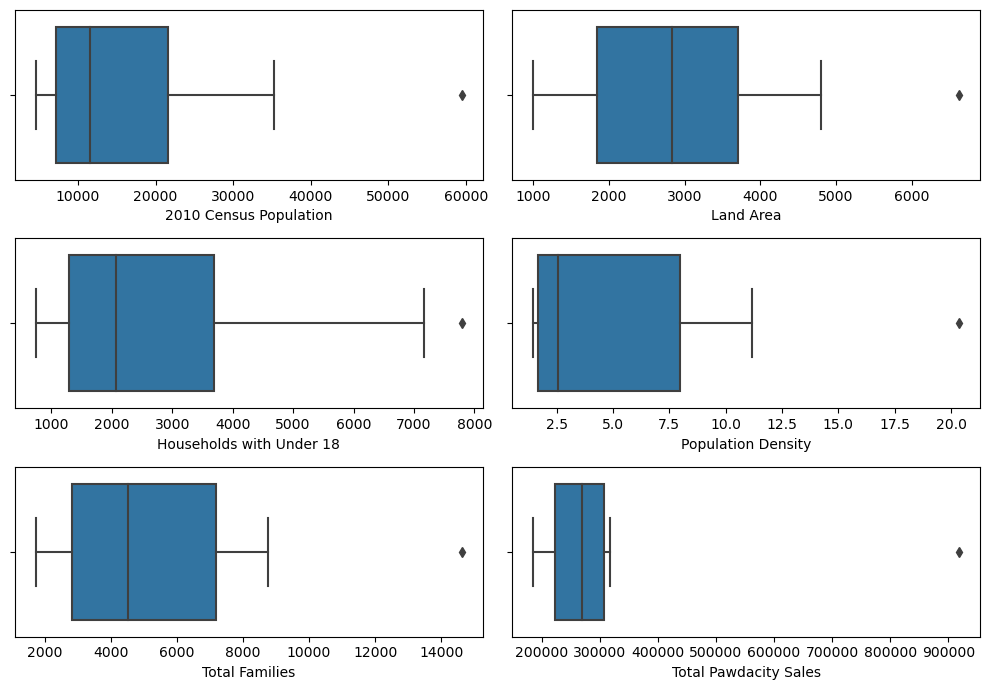

In [75]:
"""
solution
"""
fig = plt.figure(figsize=(10, 7))

for i in range(6):
    fig.tight_layout()
    
    grid_col = "32{}".format(i+1)
    
    ax = fig.add_subplot(int(grid_col))
    
    sns.boxplot(data=train_data, x=col_names[i], ax=ax)

plt.show()

---

# How to Detect and Remove Outliers using Interquantile Range(IQR)

## Read and Explore the dataset

In [30]:
# import some manipulation libraries
import pandas as pd
import numpy as np

In [2]:
# read the dataset
train = pd.read_csv('../train.csv')

In [31]:
# Explore the dataset
train.head()

,2010 Census Population,City,Land Area,Households with Under 18,Population Density,Total Families,Total Pawdacity Sales
0,4585,Buffalo,3115.50750,746,1.55,1819.50,185328
1,35316,Casper,3894.30910,7788,11.16,8756.32,317736
2,59466,Cheyenne,1500.17840,7158,20.34,14612.64,917892
3,9520,Cody,2998.95696,1403,1.82,3515.62,218376
4,6120,Douglas,1829.46510,832,1.46,1744.08,208008


In [32]:
# Check missing values
train.isnull().sum()

2010 Census Population      0
City                        0
Land Area                   0
Households with Under 18    0
Population Density          0
Total Families              0
Total Pawdacity Sales       0
dtype: int64

In [33]:
# Check the shape of the dataset
train.shape

(10, 7)

In [34]:
# Get the numerical columns
num_cols = train.describe(exclude="object")
col_names = num_cols.columns
col_names

Index(['2010 Census Population', 'Land Area', 'Households with Under 18',
       'Population Density', 'Total Families', 'Total Pawdacity Sales'],
      dtype='object')

In [39]:
# Define the function to detect outlier
def detect_outlier(df, cols):
    
    # create an empty dict
    outlier_dict = {}
    
    for col in cols:
        
        # claculate q1, q3, iqr
        
        q1 = np.quantile(df[col], 0.25)
        
        q3 = np.quantile(df[col], 0.75)
        
        iqr = q3 - q1
        
        # find upper fence and lower fence
        upper_fence = q3 + (1.5 * iqr)
        
        lower_fence = q1 - (1.5*iqr)
        
        
        outlier = df.loc[((df[col]<=lower_fence)|(df[col]>=upper_fence))][[col]]
        
        outlier_dict[col] = [q1, q3, iqr, upper_fence, lower_fence, outlier.values]
    
    
    return outlier_dict


In [40]:
# call the function and create dataframe

outlier = detect_outlier(train, col_names)

In [41]:
df = pd.DataFrame(outlier).set_index(pd.Index(['q1', 'q3', 'iqr', 'upper_fence', 'lower fence','outlier']))

In [42]:
df

,2010 Census Population,Land Area,Households with Under 18,Population Density,Total Families,Total Pawdacity Sales
q1,7115.50,1845.593087,1289.00,1.67000,2818.02500,222264.0
q3,21638.00,3699.608700,3686.50,7.97250,7189.06250,306990.0
iqr,14522.50,1854.015613,2397.50,6.30250,4371.03750,84726.0
upper_fence,43421.75,6480.632120,7282.75,17.42625,13745.61875,434079.0
lower fence,-14668.25,-935.430332,-2307.25,-7.78375,-3738.53125,95175.0
outlier,[[59466]],[[6620.201916]],[[7788]],[[20.34]],[[14612.64]],[[917892]]
